In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Steps to find closed form solution of Locally Weighted Regression
- Data Preparation
- Find the weighted matrix
- use formaula to find Theta and do predictions

In [41]:
X = pd.read_csv("./weightedX.csv")
y = pd.read_csv("./weightedY.csv")

In [42]:
X = X.values
y = y.values
X.shape,y.shape

((99, 1), (99, 1))

### Normalize the data and then visualize

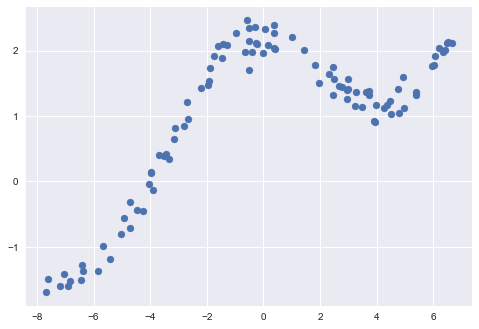

In [43]:
u = np.mean(X)
std = np.std(y)
X = (X-u)/std
plt.style.use("seaborn")
plt.scatter(X,y)
plt.show()

# Weighted Matrix 
- np.eye gives us a array so we need to convert this to a matrix

In [83]:
def getW(X,query_X,tau):
    m = X.shape[0]
    w = np.mat(np.eye(m))
    for i in range(m):
        xi = X[i]
        x = query_X
        w[i,i] = np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return w

In [84]:
#either send x matrix or x
W = getW(np.mat(X),-1,1)
W_= getW(X,-1,1)
print(W)
print("=========")
print(W_)

[[9.02107080e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.62443926e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.06324125e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.77381338e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.48358997e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.82012429e-08]]
[[9.02107080e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.62443926e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.06324125e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.77381338e-01
  0.00000000e+00 0.00000000e+00]

# Making Predictions

In [85]:
# query X is a matrix with one column
def predict(X,y,query_X,tau):
    ones = np.ones((X.shape[0],1))
    X_ = np.hstack((ones,X))
    # query point shoud also have Xo = 1  in it
    query_X = np.mat([1,query_X])
    W = getW(X_,query_X,tau)
   # print(W.shape)
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*y))
    #prediction is just like hypothesis function
    prediction = np.dot(query_X,theta)
    #print(theta)
    #print(theta.shape)
    return theta,prediction

In [86]:
theta,prediction = predict(X,y,0,1)

In [87]:
print(theta)
print(prediction)

[[2.09964328]
 [0.02225066]]
[[2.09964328]]


# Visualize Predictions and Analyze effect of tau

In [131]:
def plotPredict(tau):
    X_test = np.linspace(-8,8,30)
    Y_test = []
     
    for xq in X_test:
        theta,pred = predict(X,y,xq,tau)
        Y_test.append(pred[0][0])
        
    Y_test = np.array(Y_test)
    
    Xo = np.array(X)
    Yo = np.array(y)
    plt.scatter(Xo,Yo)
    plt.title("Tau/Bandwidth is %.2f"%tau)
    plt.scatter(X_test,Y_test,color="red")
    plt.show()

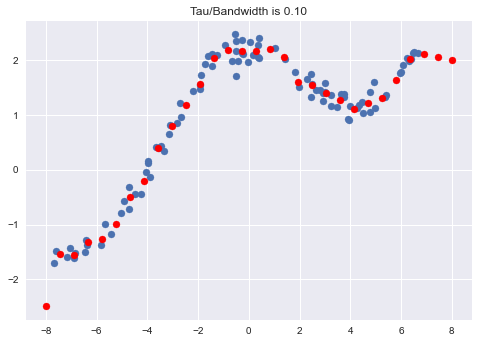

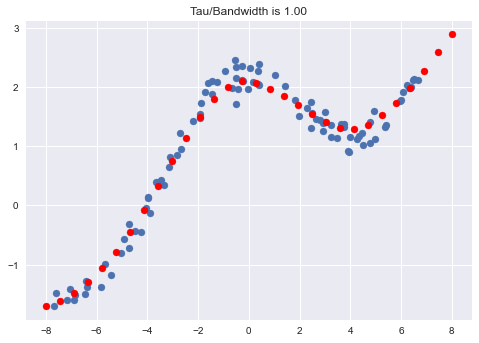

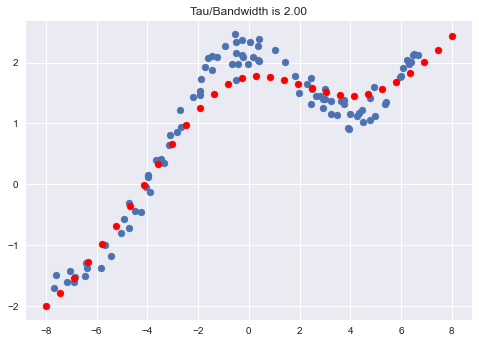

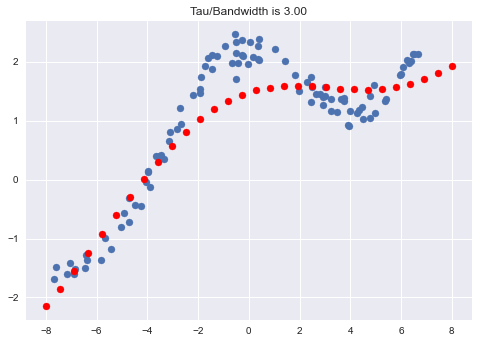

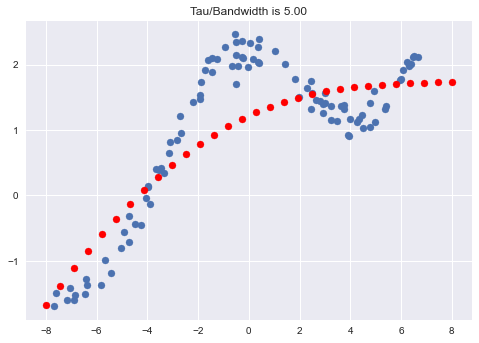

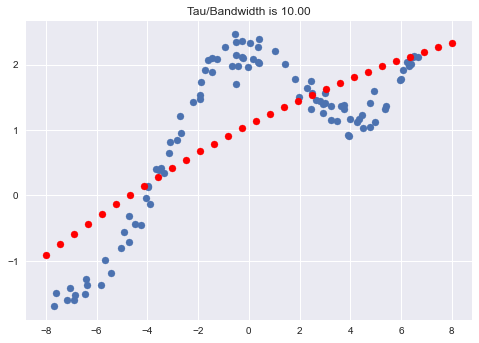

In [132]:
tau = [0.1,1,2,3,5,10]
for i in tau:
    plotPredict(i)